# Pytorch_6_Proste sieci neuronowe_torch.nn.Linear

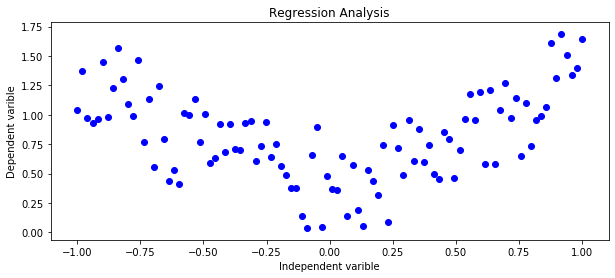

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.9 * torch.rand(x.size())

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()


### Definicje

In [2]:
x.requires_grad = True
y.requires_grad = True

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

### Definicja sieci, optymalizatora i błędu

In [3]:
net = Net(1, 10, 1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.07)
criterion = torch.nn.MSELoss()

### Szkolenie modelu

In [4]:
for t in range(200):
    y_pred = net(x)

    loss= criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    print("Epoch {}: {}".format(t, loss))
    optimizer.step()

Epoch 0: 0.7782390117645264
Epoch 1: 0.31964385509490967
Epoch 2: 0.20672887563705444
Epoch 3: 0.1770460456609726
Epoch 4: 0.16741426289081573
Epoch 5: 0.16276122629642487
Epoch 6: 0.15953928232192993
Epoch 7: 0.15691430866718292
Epoch 8: 0.1546652913093567
Epoch 9: 0.1527116447687149
Epoch 10: 0.15100790560245514
Epoch 11: 0.1495201587677002
Epoch 12: 0.14822018146514893
Epoch 13: 0.14708371460437775
Epoch 14: 0.14608976244926453
Epoch 15: 0.14521987736225128
Epoch 16: 0.144456684589386
Epoch 17: 0.14378754794597626
Epoch 18: 0.1432000696659088
Epoch 19: 0.14268232882022858
Epoch 20: 0.14222684502601624
Epoch 21: 0.1418255865573883
Epoch 22: 0.14147153496742249
Epoch 23: 0.1411566585302353
Epoch 24: 0.1408732533454895
Epoch 25: 0.14062130451202393
Epoch 26: 0.14039702713489532
Epoch 27: 0.14019618928432465
Epoch 28: 0.14001458883285522
Epoch 29: 0.13985083997249603
Epoch 30: 0.13970261812210083
Epoch 31: 0.13956785202026367
Epoch 32: 0.13944421708583832
Epoch 33: 0.13932976126670837
E

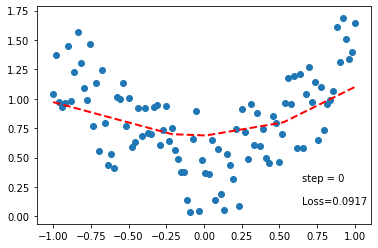

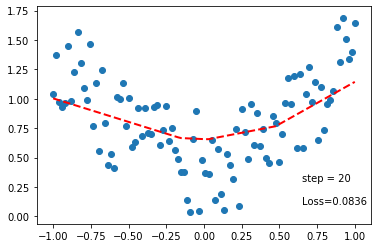

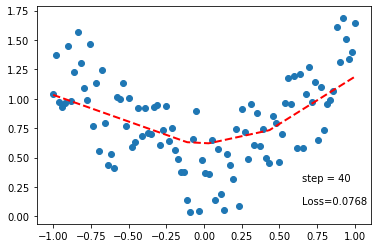

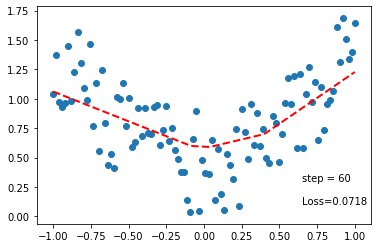

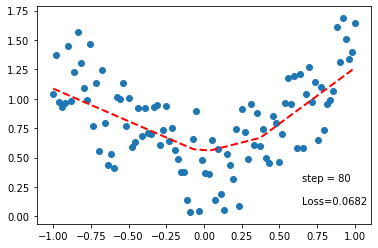

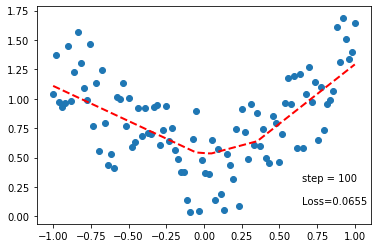

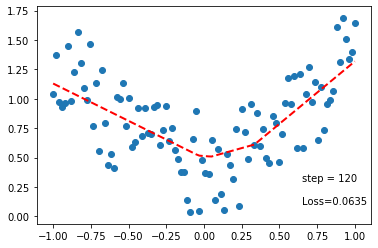

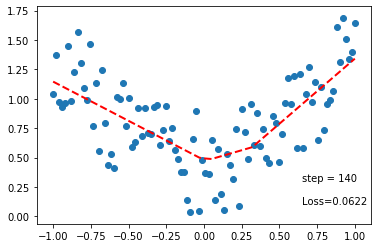

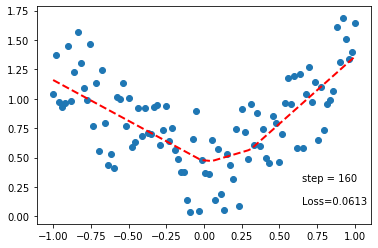

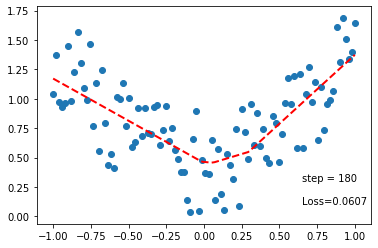

In [5]:
for t in range(200):
    y_pred = net(x)

    loss= criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    #print("Epoch {}: {}".format(t, loss))
    optimizer.step()
    
    if t % 20 == 0:                             #3. Pokazuje naukę co 100 kroków
           # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r--', lw=2)
        plt.text(0.65, 0.1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'black'})
        plt.text(0.65, 0.3, 'step = %d' % t, fontdict={'size': 10, 'color':  'black'})
        plt.pause(0.1)

plt.show()